## Project: Wrangle and Analyze Data

### Gathering

#### 1. Import 'twitter_archive_enhanced.csv'

In [1]:
import pandas as pd

In [2]:
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive.shape

(2356, 17)

#### 2. Import 'image_predictions.tsv'

In [2]:
import requests
import os

In [5]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)

In [6]:
folder_name='image-predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [7]:
with open (os.path.join(folder_name,url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)

In [8]:
image_predictions=pd.read_csv('image-predictions/image-predictions.tsv',sep='\t')

In [9]:
# do not forget to delete
image_predictions.head()

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        1         German_shepherd  0.596461    True            malinois   
3        1     Rhodesian_ridgeback  0.408143    True             redbone   
4        1      miniature_pinscher  0.560311    True          Rottweiler   

    p2_conf  p2_dog                   p3   p3_conf  p3_dog  
0  0.156665    True    Shetland_sheepdog  0.061428    True  
1  0.074192    True  Rhodesian_ridgeback  0.072010    True  
2  0.138584    True           bloodhound  0.116197    True  
3  0.360687    True   miniature_pinscher  0.222752    True  
4  0.243682    True             Doberman  0.154629    True

#### 3. Import data about retweet counts and favorite counts from Twitter API

In [10]:
import tweepy

consumer_key = 'XXX'
consumer_secret = 'XXX'
access_token = 'XXX'
access_secret = 'XXX'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth,parser=tweepy.parsers.JSONParser(),wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [11]:
folder_name = 'API_data'
# Make directory if it doesn't already exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [3]:
import time
import json
import numpy as np

In [14]:
id_list=twitter_archive['tweet_id'].tolist()
start_time=time.time()
with open ('tweet_json.txt','w') as file:
    for tweet_id in id_list:
        try:
        # This cell is slow so print ranking to gauge time remaining
            ranking = id_list.index(tweet_id) + 1
            print(ranking)
            status=api.get_status(tweet_id, tweet_mode='extended')
            file.write(json.dumps(status) + '\n')
            
        except Exception as e:
            print("No tweet found for {} with error message {}".format(str(tweet_id),str(e)))

end_time=time.time()
print("Whole process finished in {} seconds".format(end_time-start_time))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
No tweet found for 888202515573088257 with error message [{'code': 144, 'message': 'No status found with that ID.'}]
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
No tweet found for 873697596434513921 with error message [{'code': 144, 'message': 'No status found with that ID.'}]
97
98
99
100
101
102
No tweet found for 872668790621863937 with error message [{'code': 144, 'message': 'No status found with that ID.'}]
103
104
105
No tweet found for 872261713294495745 with error message [{'code': 144, 'message': 'No status found with that ID.'}]
106
107
108
109
110
111
112
113
114
115
116
117
118
119
No tweet found for 869988702071779329 with error message [{'code': 144, 'message': 'No status found with that ID.'}]
120
121
122
123
124
125
126
127
128
129
130
131

1296
1297
1298
1299
1300
1301
1302
1303
1304
1305
1306
1307
1308
1309
1310
1311
1312
1313
1314
1315
1316
1317
1318
1319
1320
1321
1322
1323
1324
1325
1326
1327
1328
1329
1330
1331
1332
1333
1334
1335
1336
1337
1338
1339
1340
1341
1342
1343
1344
1345
1346
1347
1348
1349
1350
1351
1352
1353
1354
1355
1356
1357
1358
1359
1360
1361
1362
1363
1364
1365
1366
1367
1368
1369
1370
1371
1372
1373
1374
1375
1376
1377
1378
1379
1380
1381
1382
1383
1384
1385
1386
1387
1388
1389
1390
1391
1392
1393
1394
1395
1396
1397
1398
1399
1400
1401
1402
1403
1404
1405
1406
1407
1408
1409
1410
1411
1412
1413
1414
1415
1416
1417
1418
1419
1420
1421
1422
1423
1424
1425
1426
1427
1428
1429
1430
1431
1432
1433
1434
1435
1436
1437
1438
1439
1440
1441
1442
1443
1444
1445
1446
1447
1448
1449
1450
1451
1452
1453
1454
1455
1456
1457
1458
1459
1460
1461
1462
1463
1464
1465
1466
1467
1468
1469
1470
1471
1472
1473
1474
1475
1476
1477
1478
1479
1480
1481
1482
1483
1484
1485
1486
1487
1488
1489
1490
1491
1492
1493
1494
1495


In [15]:
# Read data from 'tweet_json.txt' and turn them into a dataframe
df_list=[]
with open ('tweet_json.txt','r') as json_file:
    for line in json_file:
        json_data=json.loads(line)
        timestamp =json_data['created_at']
        retweet_count =json_data['retweet_count']
        favorite_count=json_data['favorite_count']
       # Append to list of dictionaries
        df_list.append({'id': json_data['id'],
                        'timestamp': timestamp,
                        'retweet_count': retweet_count,
                        'favorite_count':favorite_count})
Data_from_API=pd.DataFrame(df_list,columns=['id','timestamp','retweet_count','favorite_count'])

In [16]:
Data_from_API.head()

id                       timestamp  retweet_count  \
0  892420643555336193  Tue Aug 01 16:23:56 +0000 2017           7512   
1  892177421306343426  Tue Aug 01 00:17:27 +0000 2017           5577   
2  891815181378084864  Mon Jul 31 00:18:03 +0000 2017           3695   
3  891689557279858688  Sun Jul 30 15:58:51 +0000 2017           7694   
4  891327558926688256  Sat Jul 29 16:00:24 +0000 2017           8299   

   favorite_count  
0           35550  
1           30764  
2           23130  
3           38818  
4           37087

### Assessing

In [17]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
twitter_archive.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
746   780074436359819264                    NaN                  NaN   
1413  698907974262222848                    NaN                  NaN   
371   828408677031882754                    NaN                  NaN   
1287  708356463048204288                    NaN                  NaN   
58    880935762899988482                    NaN                  NaN   

                      timestamp  \
746   2016-09-25 16:00:13 +0000   
1413  2016-02-14 16:33:40 +0000   
371   2017-02-06 01:03:14 +0000   
1287  2016-03-11 18:18:36 +0000   
58    2017-06-30 23:47:07 +0000   

                                                 source  \
746   <a href="http://vine.co" rel="nofollow">Vine -...   
1413  <a href="http://twitter.com/download/iphone" r...   
371   <a href="http://twitter.com/download/iphone" r...   
1287  <a href="http://twitter.com/download/iphone" r...   
58    <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
746   Here's a doggo questioning his entire existenc...                  NaN   
1413  This dog is never sure if he's doing the right...                  NaN   
371   This is Bear. He went outside to play in the s...                  NaN   
1287  This is Oliver. That is his castle. He protect...                  NaN   
58    This is Louis. He's crossing. It's a big deal....                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
746                        NaN                        NaN   
1413                       NaN                        NaN   
371                        NaN                        NaN   
1287                       NaN                        NaN   
58                         NaN                        NaN   

                                          expanded_urls  rating_numerator  \
746                       https://vine.co/v/5nzYBpl0TY2                10   
1413  https://twitter.com/dog_rates/status/698907974...                10   
371   https://twitter.com/dog_rates/status/828408677...                12   
1287  https://twitter.com/dog_rates/status/708356463...                10   
58    https://twitter.com/dog_rates/status/880935762...                13   

      rating_denominator    name  doggo floofer pupper puppo  
746                   10    None  doggo    None   None  None  
1413                  10    None   None    None   None  None  
371                   10    Bear   None    None   None  None  
1287                  10  Oliver   None    None   None  None  
58                    10   Louis   None    None   None  None

In [19]:
twitter_archive[twitter_archive.retweeted_status_id.isnull()==False].shape

(181, 17)

In [20]:
twitter_archive.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
count  2.356000e+03           7.800000e+01         7.800000e+01   
mean   7.427716e+17           7.455079e+17         2.014171e+16   
std    6.856705e+16           7.582492e+16         1.252797e+17   
min    6.660209e+17           6.658147e+17         1.185634e+07   
25%    6.783989e+17           6.757419e+17         3.086374e+08   
50%    7.196279e+17           7.038708e+17         4.196984e+09   
75%    7.993373e+17           8.257804e+17         4.196984e+09   
max    8.924206e+17           8.862664e+17         8.405479e+17   

       retweeted_status_id  retweeted_status_user_id  rating_numerator  \
count         1.810000e+02              1.810000e+02       2356.000000   
mean          7.720400e+17              1.241698e+16         13.126486   
std           6.236928e+16              9.599254e+16         45.876648   
min           6.661041e+17              7.832140e+05          0.000000   
25%           7.186315e+17              4.196984e+09         10.000000   
50%           7.804657e+17              4.196984e+09         11.000000   
75%           8.203146e+17              4.196984e+09         12.000000   
max           8.874740e+17              7.874618e+17       1776.000000   

       rating_denominator  
count         2356.000000  
mean            10.455433  
std              6.745237  
min              0.000000  
25%             10.000000  
50%             10.000000  
75%             10.000000  
max            170.000000

In [21]:
twitter_archive[twitter_archive.rating_denominator!=10]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
313   835246439529840640           8.352460e+17         2.625958e+07   
342   832088576586297345           8.320875e+17         3.058208e+07   
433   820690176645140481                    NaN                  NaN   
516   810984652412424192                    NaN                  NaN   
784   775096608509886464                    NaN                  NaN   
902   758467244762497024                    NaN                  NaN   
1068  740373189193256964                    NaN                  NaN   
1120  731156023742988288                    NaN                  NaN   
1165  722974582966214656                    NaN                  NaN   
1202  716439118184652801                    NaN                  NaN   
1228  713900603437621249                    NaN                  NaN   
1254  710658690886586372                    NaN                  NaN   
1274  709198395643068416                    NaN                  NaN   
1351  704054845121142784                    NaN                  NaN   
1433  697463031882764288                    NaN                  NaN   
1598  686035780142297088           6.860340e+17         4.196984e+09   
1634  684225744407494656           6.842229e+17         4.196984e+09   
1635  684222868335505415                    NaN                  NaN   
1662  682962037429899265                    NaN                  NaN   
1663  682808988178739200           6.827884e+17         4.196984e+09   
1779  677716515794329600                    NaN                  NaN   
1843  675853064436391936                    NaN                  NaN   
2335  666287406224695296                    NaN                  NaN   

                      timestamp  \
313   2017-02-24 21:54:03 +0000   
342   2017-02-16 04:45:50 +0000   
433   2017-01-15 17:52:40 +0000   
516   2016-12-19 23:06:23 +0000   
784   2016-09-11 22:20:06 +0000   
902   2016-07-28 01:00:57 +0000   
1068  2016-06-08 02:41:38 +0000   
1120  2016-05-13 16:15:54 +0000   
1165  2016-04-21 02:25:47 +0000   
1202  2016-04-03 01:36:11 +0000   
1228  2016-03-27 01:29:02 +0000   
1254  2016-03-18 02:46:49 +0000   
1274  2016-03-14 02:04:08 +0000   
1351  2016-02-28 21:25:30 +0000   
1433  2016-02-10 16:51:59 +0000   
1598  2016-01-10 04:04:10 +0000   
1634  2016-01-05 04:11:44 +0000   
1635  2016-01-05 04:00:18 +0000   
1662  2016-01-01 16:30:13 +0000   
1663  2016-01-01 06:22:03 +0000   
1779  2015-12-18 05:06:23 +0000   
1843  2015-12-13 01:41:41 +0000   
2335  2015-11-16 16:11:11 +0000   

                                                 source  \
313   <a href="http://twitter.com/download/iphone" r...   
342   <a href="http://twitter.com/download/iphone" r...   
433   <a href="http://twitter.com/download/iphone" r...   
516   <a href="http://twitter.com/download/iphone" r...   
784   <a href="http://twitter.com/download/iphone" r...   
902   <a href="http://twitter.com/download/iphone" r...   
1068  <a href="http://twitter.com/download/iphone" r...   
1120  <a href="http://twitter.com/download/iphone" r...   
1165  <a href="http://twitter.com/download/iphone" r...   
1202  <a href="http://twitter.com/download/iphone" r...   
1228  <a href="http://twitter.com/download/iphone" r...   
1254  <a href="http://twitter.com/download/iphone" r...   
1274  <a href="http://twitter.com/download/iphone" r...   
1351  <a href="http://twitter.com/download/iphone" r...   
1433  <a href="http://twitter.com/download/iphone" r...   
1598  <a href="http://twitter.com/download/iphone" r...   
1634  <a href="http://twitter.com/download/iphone" r...   
1635  <a href="http://twitter.com/download/iphone" r...   
1662  <a href="http://twitter.com/download/iphone" r...   
1663  <a href="http://twitter.com/download/iphone" r...   
1779  <a href="http://twitter.com/download/iphone" r...   
1843  <a href="http://twitter.com/download/iphone" r...   
2335  <a href="http://twitter.com/download/iphone" r...   

                             

In [22]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

#### 1. twitter_archive table
##### Quality
- 181 retweets are included
- do not need columns: retweeted_status_id,retweeted_status_user_id, retweeted_status_timestamp
- 78 replies are included
- do not need columns: in_reply_to_status_id, in_reply_to_user_id
- data type of tweet_id is int64 (should be object)
- data type of timestamp is object (should be datetime)
- some ratings are not accurate: 
     <ul>
    <li>The rating of id 740373189193256964 should be 14/10 not 9/11</li>
    <li>The rating of id 722974582966214656 should be 13/10 not 4/20</li>
    <li>The rating of id 716439118184652801 should be 11/10 not 50/50</li>
    <li>The rating of id 682962037429899265 should be 10/10 not 7/11</li>
    <li>The rating of id 666287406224695296 should be 9/10 not 1/2</li></ul>
- the rating of 0/10 (id=835152434251116000) is not about dog, it is about plagiarism
- the tweet of id 810984652412424192, has no rating
- wrongly extracted dog names that start with lower case letters
- missing dog names
    
##### Tidiness
- columns of 'doggo','floofer','pupper', and 'puppo' are one variable (they can be in one 'stage' column)
- 'text' column contains text and url

In [23]:
image_predictions.sample(5)

tweet_id                                          jpg_url  \
692   684222868335505415  https://pbs.twimg.com/media/CX7Y_ByWwAEJdUy.jpg   
686   684097758874210310  https://pbs.twimg.com/media/CX5nR5oWsAAiclh.jpg   
195   669583744538451968  https://pbs.twimg.com/media/CUrW3DWXIAAiRqk.jpg   
1266  749395845976588288  https://pbs.twimg.com/media/CmZjizYW8AA3FCN.jpg   
1032  711652651650457602  https://pbs.twimg.com/media/CeBMT6-WIAA7Qqf.jpg   

      img_num                           p1   p1_conf  p1_dog  \
692         1  soft-coated_wheaten_terrier  0.791182    True   
686         1           Labrador_retriever  0.627856    True   
195         1                       candle  0.174315   False   
1266        1                   Pomeranian  0.973715    True   
1032        1                        llama  0.856789   False   

                               p2   p2_conf  p2_dog                        p3  \
692                cocker_spaniel  0.072444    True                     teddy   
686   German_short-haired_pointer  0.173675    True  Chesapeake_Bay_retriever   
195                     lampshade  0.120407   False                   plunger   
1266                         chow  0.020758    True                  keeshond   
1032                Arabian_camel  0.098727   False                neck_brace   

       p3_conf  p3_dog  
692   0.071486   False  
686   0.041342    True  
195   0.072099   False  
1266  0.003784    True  
1032  0.016377   False

In [24]:
image_predictions.shape

(2075, 12)

In [25]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### 2. image_predictions table
##### Quality
- some pictures are not dogs
- data type of id is int64 (should be object)

In [26]:
Data_from_API.head()

id                       timestamp  retweet_count  \
0  892420643555336193  Tue Aug 01 16:23:56 +0000 2017           7512   
1  892177421306343426  Tue Aug 01 00:17:27 +0000 2017           5577   
2  891815181378084864  Mon Jul 31 00:18:03 +0000 2017           3695   
3  891689557279858688  Sun Jul 30 15:58:51 +0000 2017           7694   
4  891327558926688256  Sat Jul 29 16:00:24 +0000 2017           8299   

   favorite_count  
0           35550  
1           30764  
2           23130  
3           38818  
4           37087

In [27]:
Data_from_API.shape

(2331, 4)

In [28]:
Data_from_API.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 4 columns):
id                2331 non-null int64
timestamp         2331 non-null object
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3), object(1)
memory usage: 72.9+ KB


In [29]:
Data_from_API.describe()

id  retweet_count  favorite_count
count  2.331000e+03    2331.000000     2331.000000
mean   7.419079e+17    2644.024453     7425.354354
std    6.823170e+16    4471.397164    11528.786002
min    6.660209e+17       1.000000        0.000000
25%    6.782670e+17     536.000000     1291.500000
50%    7.182469e+17    1236.000000     3230.000000
75%    7.986692e+17    3067.000000     9084.500000
max    8.924206e+17   75973.000000   153270.000000

#### 3. Data_from_API table
##### Quality
- data type of id is int64 (should be object)
- the column name 'id' is inconsistent with the other tables ('tweet_id')

### Cleaning

In [30]:
twitter_archive_clean=twitter_archive.copy()
image_predictions_clean=image_predictions.copy()
Data_from_API_clean=Data_from_API.copy()

#### Before merging
#### Define

- delete 181 retweets
- drop columns about retweet status (retweeted_status_id,retweeted_status_user_id, retweeted_status_timestamp)
- delete 78 replies
- drop columns about replies status (in_reply_to_status_id, in_reply_to_user_id)
- combine columns of doggo, floofer, pupper, and puppo to one column
- change the name of id column in Data_from_API to 'tweet_id'
- change the data types of tweet_id in 3 tables to string (with astype()) 

#### Code

In [31]:
# delete retweets
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean.retweeted_status_id.isnull()==True]

In [32]:
# drop columns about retweets
twitter_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

In [33]:
# delete replies
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.isnull()==True]

In [34]:
# drop columns about replies
twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1,inplace=True)

In [35]:
# replace None with ''
twitter_archive_clean.doggo.replace('None', '', inplace=True)
twitter_archive_clean.floofer.replace('None', '', inplace=True)
twitter_archive_clean.pupper.replace('None', '', inplace=True)
twitter_archive_clean.puppo.replace('None', '', inplace=True)

In [36]:
# concatenate all the stages
twitter_archive_clean['stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo

In [37]:
twitter_archive_clean.stage.value_counts()

                1761
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: stage, dtype: int64

In [38]:
# change the format about multistage 
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggopupper', 'stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggopuppo', 'stage'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.stage == 'doggofloofer', 'stage'] = 'doggo, floofer'
twitter_archive_clean.loc[twitter_archive_clean.stage == '', 'stage'] = np.nan

In [39]:
twitter_archive_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

In [40]:
# change the name of id column in Data_from_API to 'tweet_id'
Data_from_API_clean.rename(columns={'id':'tweet_id'},inplace=True)

In [41]:
# change the data types of tweet_id in 3 tables to string (with astype()) 
twitter_archive_clean.tweet_id=twitter_archive_clean.tweet_id.astype(str)
image_predictions_clean.tweet_id=image_predictions_clean.tweet_id.astype(str)
Data_from_API_clean.tweet_id=Data_from_API_clean.tweet_id.astype(str)

#### Testing

In [42]:
twitter_archive_clean.stage.value_counts()

pupper            221
doggo              72
puppo              23
floofer             9
doggo, pupper       9
doggo, floofer      1
doggo, puppo        1
Name: stage, dtype: int64

In [43]:
twitter_archive_clean.head()

tweet_id                  timestamp  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name stage  
0                  10   Phineas   NaN  
1                  10     Tilly   NaN  
2                  10    Archie   NaN  
3                  10     Darla   NaN  
4                  10  Franklin   NaN

In [44]:
twitter_archive_clean.shape

(2097, 9)

In [45]:
# Test the data type of tweet_id
Data_from_API_clean.tweet_id.dtypes

dtype('O')

In [46]:
image_predictions_clean.tweet_id.dtypes

dtype('O')

In [47]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
stage                 336 non-null object
dtypes: int64(2), object(7)
memory usage: 163.8+ KB


#### Merging
#### Define
- merge 3 tables on 'tweet_id'

#### Code

In [48]:
# merge twitter_archive_clean with Data_from_API_clean by innner join
merged_temp = pd.merge(left=twitter_archive_clean, right=Data_from_API_clean, left_on='tweet_id', right_on='tweet_id' , how= 'inner')

In [49]:
# merge merged_temp with image_predictions_clean by left join 
# In my opinion, the image_predictions_clean is used to filter out the tweets not about dogs. Inner join is to make sure that the final results are all dogs.
twitter_archive_master = pd.merge(left=merged_temp, right=image_predictions_clean, left_on='tweet_id', right_on='tweet_id' , how= 'inner')

#### Testing

In [50]:
twitter_archive_master.head()

tweet_id                timestamp_x  \
0  892420643555336193  2017-08-01 16:23:56 +0000   
1  892177421306343426  2017-08-01 00:17:27 +0000   
2  891815181378084864  2017-07-31 00:18:03 +0000   
3  891689557279858688  2017-07-30 15:58:51 +0000   
4  891327558926688256  2017-07-29 16:00:24 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  \
0  This is Phineas. He's a mystical boy. Only eve...   
1  This is Tilly. She's just checking pup on you....   
2  This is Archie. He is a rare Norwegian Pouncin...   
3  This is Darla. She commenced a snooze mid meal...   
4  This is Franklin. He would like you to stop ca...   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   
1  https://twitter.com/dog_rates/status/892177421...                13   
2  https://twitter.com/dog_rates/status/891815181...                12   
3  https://twitter.com/dog_rates/status/891689557...                13   
4  https://twitter.com/dog_rates/status/891327558...                12   

   rating_denominator      name stage                     timestamp_y  ...  \
0                  10   Phineas   NaN  Tue Aug 01 16:23:56 +0000 2017  ...   
1                  10     Tilly   NaN  Tue Aug 01 00:17:27 +0000 2017  ...   
2                  10    Archie   NaN  Mon Jul 31 00:18:03 +0000 2017  ...   
3                  10     Darla   NaN  Sun Jul 30 15:58:51 +0000 2017  ...   
4                  10  Franklin   NaN  Sat Jul 29 16:00:24 +0000 2017  ...   

   img_num           p1   p1_conf  p1_dog                  p2   p2_conf  \
0        1       orange  0.097049   False               bagel  0.085851   
1        1    Chihuahua  0.323581    True            Pekinese  0.090647   
2        1    Chihuahua  0.716012    True            malamute  0.078253   
3        1  paper_towel  0.170278   False  Labrador_retriever  0.168086   
4        2       basset  0.555712    True    English_springer  0.225770   

   p2_dog                           p3   p3_conf  p3_dog  
0   False                       banana  0.076110   False  
1    True                     papillon  0.068957    True  
2    True                       kelpie  0.031379    True  
3    True                      spatula  0.040836   False  
4    True  German_short-haired_pointer  0.175219    True  

[5 rows x 23 columns]

In [51]:
twitter_archive_master.shape

(1964, 23)

#### After merging
#### Define
##### Quality
- drop timestamp_y and rename timestamp_x
- change data type of column timestamp
- drop the tweets not about dogs (p1_dog is 'False')

#### Code

In [52]:
twitter_archive_master_clean=twitter_archive_master.copy()

In [53]:
# drop timestamp_y and rename timestamp_x
twitter_archive_master_clean.drop('timestamp_y',axis=1,inplace=True)
twitter_archive_master_clean.rename(columns={'timestamp_x':'timestamp'},inplace=True)

In [54]:
# change data type of column timestamp
twitter_archive_master_clean.timestamp=twitter_archive_master_clean.timestamp.astype('datetime64')

In [55]:
# drop the tweets not about dogs (p1_dog is 'False')
twitter_archive_master_clean=twitter_archive_master_clean.query('p1_dog==True')

#### Testing

In [56]:
twitter_archive_master_clean.shape

(1456, 22)

In [57]:
twitter_archive_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 1 to 1963
Data columns (total 22 columns):
tweet_id              1456 non-null object
timestamp             1456 non-null datetime64[ns]
source                1456 non-null object
text                  1456 non-null object
expanded_urls         1456 non-null object
rating_numerator      1456 non-null int64
rating_denominator    1456 non-null int64
name                  1456 non-null object
stage                 226 non-null object
retweet_count         1456 non-null int64
favorite_count        1456 non-null int64
jpg_url               1456 non-null object
img_num               1456 non-null int64
p1                    1456 non-null object
p1_conf               1456 non-null float64
p1_dog                1456 non-null bool
p2                    1456 non-null object
p2_conf               1456 non-null float64
p2_dog                1456 non-null bool
p3                    1456 non-null object
p3_conf               1456 non-nu

In [58]:
sum(twitter_archive_master_clean.p1_dog==False)

0

#### Define
##### Quality
- update inaccurate ratings:
<ul>
    <li>The rating of id 740373189193256964 should be 14/10 not 9/11</li>
    <li>The rating of id 722974582966214656 should be 13/10 not 4/20</li>
    <li>The rating of id 716439118184652801 should be 11/10 not 50/50</li>
    <li>The rating of id 682962037429899265 should be 10/10 not 7/11</li>
    <li>The rating of id 666287406224695296 should be 9/10 not 1/2</li></ul>
- delete the row where the rating is 0/10 (id=835152434251116000) 
- delete the row where the rating is 24/7 (id=810984652412424192)
- make the wrongly extracted dog names (start with lower case letters) to be NaNs by np.nan
- extract dog names form text with more paterns

##### Tidiness
- split 'text' column for two columns (text and url)

#### Code

In [59]:
# update inaccurate ratings
replace_items={'740373189193256964':[14,10],'722974582966214656':[13,10],'716439118184652801':[11,10],'682962037429899265':[10,10],'666287406224695296':[9,10]}

In [60]:
# update inaccurate ratings
for replace_id,replace_ratings in replace_items.items():
    twitter_archive_master_clean.loc[twitter_archive_master_clean.tweet_id==replace_id,['rating_numerator','rating_denominator']]=replace_ratings

In [61]:
# delete the row where the rating is 0/10 (id=835152434251116000)
drop_index_1=twitter_archive_master_clean[twitter_archive_master_clean.tweet_id=='835152434251116000'].index
twitter_archive_master_clean.drop(drop_index_1,inplace=True)

In [62]:
# delete the row where the rating is 24/7 (id=810984652412424192)
drop_index_2=twitter_archive_master_clean[twitter_archive_master_clean.tweet_id=='810984652412424192'].index
twitter_archive_master_clean.drop(drop_index_2,inplace=True)

In [72]:
# reset index
twitter_archive_master_clean = twitter_archive_master_clean.reset_index(drop=True)

In [ ]:
import re

In [106]:
# split 'text' column
url_list=[]
for text in twitter_archive_master_clean.text:
    url=re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text)
    url_list.append(url)

In [139]:
twitter_archive_master_clean['url']=url_list

In [128]:
text_list=[]
for index,tweet in twitter_archive_master_clean.iterrows():
    splitA = set(tweet[3].split(" "))
    splitB = set(tweet[-1][0].split(" "))
    diff = splitA.difference(splitB)
    text = " ".join(diff)
    text_list.append(text)

In [129]:
twitter_archive_master_clean['text']=text_list

###### extra paterns of dog names:
- name is XXX (can be uppercase)

In [83]:
# make the wrongly extracted dog names (start with lower case letters) to be NaNs by np.nan
lower_case=twitter_archive_master_clean[twitter_archive_master_clean.name.str.islower()].name.values

In [84]:
twitter_archive_master_clean.name.replace(lower_case, np.nan, inplace=True)

In [85]:
twitter_archive_master_clean.name.replace('None', np.nan, inplace=True)

In [ ]:
# extract dog names form text with more paterns
for index,tweet in twitter_archive_master_clean.iterrows():
    if tweet[7]==np.nan:
        tweet[7]=re.search(r".\s[Nn][Aa][Mm][Ee] [Ii][Ss]\s(.+)", tweet[3]).group(1)

#### Testing

In [63]:
twitter_archive_master_clean.rating_denominator.value_counts()

10     1446
80        2
50        2
150       1
110       1
90        1
70        1
40        1
Name: rating_denominator, dtype: int64

In [64]:
twitter_archive_master_clean.rating_numerator.value_counts()

12     376
10     317
11     306
13     205
9      107
8       58
7       24
14      20
6       12
5       10
4        4
3        3
165      1
121      1
26       1
27       1
44       1
45       1
60       1
75       1
80       1
84       1
88       1
99       1
2        1
Name: rating_numerator, dtype: int64

In [65]:
twitter_archive_master_clean.shape

(1455, 22)

In [87]:
sum(twitter_archive_master_clean.name.isnull())

419

In [138]:
twitter_archive_master_clean.url[7]

['https://t.co/t1bfwz5S2A']

In [158]:
twitter_archive_master_clean.text[7]

'sophisticate This stick college She 14/10 Studying Cassie. is a so elegant communication much pup. theory. doggo and international'

In [113]:
twitter_archive_master_clean['url'].dtypes

dtype('O')

In [145]:
twitter_archive_master_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'stage',
       'retweet_count', 'favorite_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'url'],
      dtype='object')

In [157]:
twitter_archive_master_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1455 entries, 0 to 1454
Data columns (total 23 columns):
tweet_id              1455 non-null object
timestamp             1455 non-null datetime64[ns]
source                1455 non-null object
text                  1455 non-null object
expanded_urls         1455 non-null object
rating_numerator      1455 non-null int64
rating_denominator    1455 non-null int64
name                  1036 non-null object
stage                 226 non-null object
retweet_count         1455 non-null int64
favorite_count        1455 non-null int64
jpg_url               1455 non-null object
img_num               1455 non-null int64
p1                    1455 non-null object
p1_conf               1455 non-null float64
p1_dog                1455 non-null bool
p2                    1455 non-null object
p2_conf               1455 non-null float64
p2_dog                1455 non-null bool
p3                    1455 non-null object
p3_conf               1455 non-nu

In [150]:
sum(twitter_archive_master_clean.name.isnull())

419

In [159]:
twitter_archive_master_clean.tail()

tweet_id           timestamp  \
1450  666049248165822465 2015-11-16 00:24:50   
1451  666044226329800704 2015-11-16 00:04:52   
1452  666033412701032449 2015-11-15 23:21:54   
1453  666029285002620928 2015-11-15 23:05:30   
1454  666020888022790149 2015-11-15 22:32:08   

                                                 source  \
1450  <a href="http://twitter.com/download/iphone" r...   
1451  <a href="http://twitter.com/download/iphone" r...   
1452  <a href="http://twitter.com/download/iphone" r...   
1453  <a href="http://twitter.com/download/iphone" r...   
1454  <a href="http://twitter.com/download/iphone" r...   

                                                   text  \
1450  News. be Enjoys Here vulpix. generation 5/10 s...   
1451  This forgot like unplug he iron. Morgan. the A...   
1452  9/10 Here of Big that happy decks. af is a ver...   
1453  western This Mitsubishi leaf. terrier. 2 of br...   
1454  Here in Japanese 8/10 Lost (?). of Big stair. ...   

                                          expanded_urls  rating_numerator  \
1450  https://twitter.com/dog_rates/status/666049248...                 5   
1451  https://twitter.com/dog_rates/status/666044226...                 6   
1452  https://twitter.com/dog_rates/status/666033412...                 9   
1453  https://twitter.com/dog_rates/status/666029285...                 7   
1454  https://twitter.com/dog_rates/status/666020888...                 8   

      rating_denominator name stage  retweet_count  ...  \
1450                  10  NaN   NaN             40  ...   
1451                  10  NaN   NaN            126  ...   
1452                  10  NaN   NaN             39  ...   
1453                  10  NaN   NaN             41  ...   
1454                  10  NaN   NaN            452  ...   

                          p1   p1_conf  p1_dog                  p2   p2_conf  \
1450      miniature_pinscher  0.560311    True          Rottweiler  0.243682   
1451     Rhodesian_ridgeback  0.408143    True             redbone  0.360687   
1452         German_shepherd  0.596461    True            malinois  0.138584   
1453                 redbone  0.506826    True  miniature_pinscher  0.074192   
1454  Welsh_springer_spaniel  0.465074    True              collie  0.156665   

      p2_dog                   p3   p3_conf  p3_dog                        url  
1450    True             Doberman  0.154629    True  [https://t.co/4B7cOc1EDq]  
1451    True   miniature_pinscher  0.222752    True  [https://t.co/DWnyCjf2mx]  
1452    True           bloodhound  0.116197    True  [https://t.co/y671yMhoiR]  
1453    True  Rhodesian_ridgeback  0.072010    True  [https://t.co/r7mOb2m0UI]  
1454    True    Shetland_sheepdog  0.061428    True  [https://t.co/BLDqew2Ijj]  

[5 rows x 23 columns]

In [160]:
# save the cleaned dataframe
twitter_archive_master_clean.to_csv('twitter_archive_master.csv',index=False)

### For the resubmission

#### Define 
- Remove decimal rating numerators

#### Code

In [4]:
df=pd.read_csv('twitter_archive_master.csv')

In [8]:
df['rating_numerator']=df['text'].str.extract(r'([0-9]+[0-9.]*/[0-9]+[0-9]*)',expand=False).str.split('/').str[0]

In [12]:
df.rating_numerator=df.rating_numerator.astype(float)

#### Testing

In [13]:
df.query("tweet_id=='883482846933004288'").rating_numerator

35    13.5
Name: rating_numerator, dtype: float64

In [14]:
df.sample(5).rating_numerator

59      12.0
18      13.0
911     10.0
1438     9.0
263     14.0
Name: rating_numerator, dtype: float64

In [17]:
# save the new table
df.to_csv('twitter_archive_master.csv',index=False)

### Analyzing

In [18]:
df=pd.read_csv('twitter_archive_master.csv')

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

### Insight No.1
- Cooper, Oliver, Charlie, Tucker, and Daisy are the top 5 most commonly used dogs names in the dataset I wrangled from WeRateDogs

In [240]:
df.timestamp.max()

'2017-08-01 00:17:27'

In [239]:
df.timestamp.min()

'2015-11-15 22:32:08'

In [189]:
label=df.name.value_counts().index[:10]

In [188]:
name_count=df.name.value_counts().values[:10]

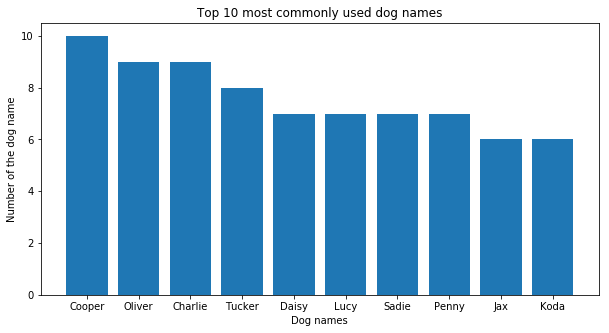

In [213]:
plt.figure(figsize=(10,5))
plt.bar(label,name_count)
plt.title('Top 10 most commonly used dog names')
plt.xlabel('Dog names')
plt.ylabel('Number of the dog name')
plt.show()

### Insight No.2 
- Most of the rating results about dogs on WeRateDogs are distributed in the range from 0.8 to 1.4
- The mean and median of the ratings results both are around 1.1
- 83% of the dogs got more than 1 score in their original tweets 
<p> (I take the quotient of rating numerator and rating denominator as the score a dog gets)<p>

In [20]:
ratings=np.array(df.rating_numerator)/np.array(df.rating_denominator)

In [21]:
np.percentile(ratings,17)

1.0

In [22]:
np.percentile(ratings,99)

1.4

In [23]:
np.median(ratings)

1.1

In [24]:
ratings.mean()

1.0888508591065291

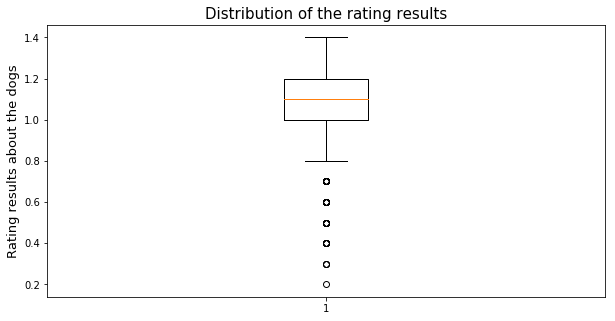

In [25]:
plt.figure(figsize=(10,5))
plt.title('Distribution of the rating results',size=15)
plt.ylabel('Rating results about the dogs',size=13)
plt.boxplot(ratings);

### Insight No.3
- The most dog stage on WeRateDogs is pupper

In [230]:
df.stage.value_counts()

pupper            144
doggo              47
puppo              19
floofer             7
doggo, pupper       7
doggo, floofer      1
doggo, puppo        1
Name: stage, dtype: int64

### Reference

- https://knowledge.udacity.com/questions/68700
- https://knowledge.udacity.com/questions/305195
- https://knowledge.udacity.com/questions/214820
- https://knowledge.udacity.com/questions/322783
- https://regexone.com/lesson/letters_and_digits